In [4]:
#Correspondancy Analysis for multiple variables

import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
import prince
import plotly.graph_objects as go
from itertools import combinations

In [6]:
#Reading the CSV file

mca_data = pd.read_csv(r"C:\Users\vitor\Documentos\Kaggle\salaries.csv")

In [7]:
#Checking the dataframe
mca_data.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2024,MI,FT,Data Scientist,120000,USD,120000,AU,0,AU,S
1,2024,MI,FT,Data Scientist,70000,USD,70000,AU,0,AU,S
2,2024,MI,CT,Data Scientist,130000,USD,130000,US,0,US,M
3,2024,MI,CT,Data Scientist,110000,USD,110000,US,0,US,M
4,2024,MI,FT,Data Science Manager,240000,USD,240000,US,0,US,M


In [8]:
mca_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16494 entries, 0 to 16493
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           16494 non-null  int64 
 1   experience_level    16494 non-null  object
 2   employment_type     16494 non-null  object
 3   job_title           16494 non-null  object
 4   salary              16494 non-null  int64 
 5   salary_currency     16494 non-null  object
 6   salary_in_usd       16494 non-null  int64 
 7   employee_residence  16494 non-null  object
 8   remote_ratio        16494 non-null  int64 
 9   company_location    16494 non-null  object
 10  company_size        16494 non-null  object
dtypes: int64(4), object(7)
memory usage: 1.4+ MB


It is possible to determine: there are some categorical variables like job_title, employee_residence, company_size. Let's check if there are relations between this three!


In [11]:
#creating a table containing only the categorical tables

mca_data_categorical = mca_data[['job_title','employee_residence','company_size']]

In [12]:
#Creating all the possible contingency tables for the categorical variables
for item in list(combinations(mca_data_categorical.columns, 2)):
    print(item, "\n")
    table = pd.crosstab(mca_data_categorical[item[0]], mca_data_categorical[item[1]])
    
    print(table)
    
    chi2, pvalor, gl, freq_esp = chi2_contingency(table)

    print(f"qui² value: {round(chi2, 2)}")
    print(f"p-value: {round(pvalor, 4)}", "\n")

('job_title', 'employee_residence') 

employee_residence               AD  AE  AM  AR  AS  AT  AU  BA  BE  BG  ...  \
job_title                                                                ...   
AI Architect                      0   0   0   0   0   0   0   0   1   0  ...   
AI Developer                      0   0   0   0   0   0   0   1   0   0  ...   
AI Engineer                       0   1   0   0   0   0   0   0   0   0  ...   
AI Product Manager                0   0   0   0   0   0   0   0   0   0  ...   
AI Programmer                     0   0   0   0   0   0   0   1   0   0  ...   
...                              ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ...   
Sales Data Analyst                0   0   0   0   0   0   0   0   0   0  ...   
Software Data Engineer            0   0   0   0   0   0   0   0   0   0  ...   
Staff Data Analyst                0   0   0   0   0   0   0   0   0   0  ...   
Staff Data Scientist              0   0   0   0   0   0   0   0   0   0  ...   
St

In [15]:
#Creating the MCA
mca = prince.MCA(n_components=2).fit(mca_data_categorical)

In [16]:
#Obtaining the eigenvalues (autovalues)
table_autovalues = mca.eigenvalues_summary

print(table_autovalues)

          eigenvalue % of variance % of variance (cumulative)
component                                                    
0              0.623         0.77%                      0.77%
1              0.569         0.70%                      1.47%


In [18]:
#Obtaining the main categories for the variables
coord_burt = mca.column_coordinates(mca_data_categorical)

print(coord_burt)

                                      0         1
job_title_AI Architect        -0.024627 -0.272411
job_title_AI Developer         4.638094 -0.327432
job_title_AI Engineer         -0.050047 -0.148279
job_title_AI Product Manager   2.098332 -0.409591
job_title_AI Programmer       11.112790 -1.385154
...                                 ...       ...
employee_residence_VN          1.302770 -0.309297
employee_residence_ZA         -0.413353 -0.064977
company_size_L                 1.548251 -0.407518
company_size_M                -0.175298  0.031061
company_size_S                 5.688086 -0.272494

[246 rows x 2 columns]


In [20]:
#Creating the standard coordinates for the variables categories
standard_coord = mca.column_coordinates(mca_data_categorical)/np.sqrt(mca.eigenvalues_)
coord_obs = mca.row_coordinates(mca_data_categorical)


                                      0         1
job_title_AI Architect        -0.031208 -0.361210
job_title_AI Developer         5.877513 -0.434167
job_title_AI Engineer         -0.063421 -0.196615
job_title_AI Product Manager   2.659061 -0.543107
job_title_AI Programmer       14.082417 -1.836680
...                                 ...       ...
employee_residence_VN          1.650903 -0.410121
employee_residence_ZA         -0.523812 -0.086158
company_size_L                 1.961983 -0.540358
company_size_M                -0.222142  0.041185
company_size_S                 7.208091 -0.361321

[246 rows x 2 columns]
              0         1
0      2.719337 -0.183850
1      2.719337 -0.183850
2     -0.165184  0.019157
3     -0.165184  0.019157
4     -0.061849 -0.014184
...         ...       ...
16489  0.562857 -0.174691
16490  1.628802 -0.515387
16491  2.311560 -0.115012
16492  2.266910 -0.409220
16493  2.489064 -0.549290

[16494 rows x 2 columns]


In [26]:
#Creating the detailed dataframe

chart = standard_coord.reset_index()

name_categ=[]
for col in mca_data_categorical:
    name_categ.append(mca_data_categorical[col].sort_values(ascending=True).unique())
    categories = pd.DataFrame(name_categ).stack().reset_index()

var_chart = pd.Series(chart['index'].str.split('_', expand=True).iloc[:,0])

chart_df_mca = pd.DataFrame({'category': chart['index'],
                             'obs_x': chart[0],
                             'obs_y': chart[1],
                             'variable': var_chart,
                             'category_id': categories[0]})

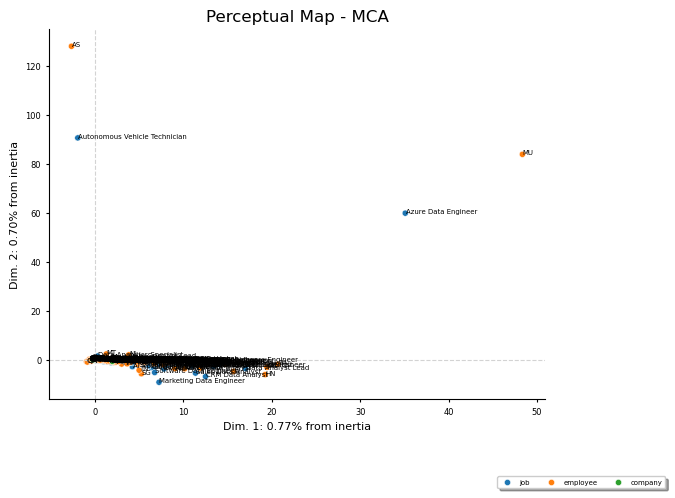

In [27]:
#Ploting the perceptual map
def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x'] + 0.03, point['y'] - 0.02, point['val'], fontsize=5)

label_point(x = chart_df_mca['obs_x'],
            y = chart_df_mca['obs_y'],
            val = chart_df_mca['category_id'],
            ax = plt.gca())

sns.scatterplot(data=chart_df_mca, x='obs_x', y='obs_y', hue='variable', s=20)
sns.despine(top=True, right=True, left=False, bottom=False)
plt.axhline(y=0, color='lightgrey', ls='--', linewidth=0.8)
plt.axvline(x=0, color='lightgrey', ls='--', linewidth=0.8)
plt.tick_params(size=2, labelsize=6)
plt.legend(bbox_to_anchor=(1.25,-0.2), fancybox=True, shadow=True, ncols=10, fontsize='5')
plt.title("Perceptual Map - MCA", fontsize=12)
plt.xlabel(f"Dim. 1: {table_autovalues.iloc[0,1]} from inertia", fontsize=8)
plt.ylabel(f"Dim. 2: {table_autovalues.iloc[1,1]} from inertia", fontsize=8)
plt.show()

Based on the graph output, even with the overlaying of observations, it is possible to determine: Besides some possible outliers, all the job_title, company_residence and company_size have a huge similarity

In [ ]:
#End of code!